<a href="https://colab.research.google.com/github/sargunasaravanan/GenAI-Workouts/blob/main/Demo_02_Generating_Fake_Images_with_Generative_Adversarial_Networks_(GANs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Demo: Generating Fake Images with Generative Adversarial Networks (GANs)__

# __Steps to Perform__

Step 1: Import the Necessary Libraries

Step 2: Load and Preprocess the Data

Step 3: Build the Generator and Discriminator

Step 4: Compile the Models

Step 5: Train the Models

Step 6: Execute the Training

Step 7: Generate New Images and Evaluate the Model's Performance



# __Step 1: Import the Necessary Libraries__

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
import numpy as np

# __Step 2: Load and Preprocess the Data__

- Load the MNIST dataset and preprocess it.
- Preprocessing involves normalizing the data that can improve models' performance.

In [2]:
# Load MNIST data
(X_train, _), (_, _) = mnist.load_data()
# Normalize to between -1 and 1
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=3)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# __Step 3: Build the Generator and Discriminator__

- Define the generator and discriminator models.
- Generator takes a random noise vector as input and outputs an image.
- Discriminator takes an image as input and outputs the probability of the image being real.

In [3]:
# Generator
def create_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

# Discriminator
def create_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# __Step 4: Compile the Models__

- Compile the models, which involves defining the loss function and the optimizer.
- The loss function evaluates the model's performance, while the optimizer aims to minimize the loss.

In [4]:
from tensorflow.keras.models import Sequential, Model

# Create and compile the discriminator
discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Create and compile the generator
generator = create_generator()
generator.compile(loss='binary_crossentropy', optimizer='adam')

# Create and compile the combined model
discriminator.trainable = False
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(inputs=gan_input, outputs=gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# __Step 5: Train the Models__

- Train the model, which involves feeding data into the models and adjusting the weights of the models based on the output.
- The primary aim is for the generator to create images indistinguishable from real images by the discriminator.

In [5]:
def train(epochs=1, batch_size=128):
    # Load the data
    (X_train, _), (_, _) = mnist.load_data()
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)

    # Labels for the batch size and the test size
    y_train_ones = np.ones((batch_size, 1))
    y_train_zeros = np.zeros((batch_size, 1))
    y_test_ones = np.ones((100, 1))

    # Start training
    for e in range(epochs):
        for i in range(X_train.shape[0] // batch_size):
            # Train Discriminator weights
            discriminator.trainable = True

            # Real samples
            X_batch = X_train[i*batch_size:(i+1)*batch_size]
            d_loss_real = discriminator.train_on_batch(x=X_batch, y=y_train_ones * (1 - 0.1 * np.random.rand(batch_size, 1)))

            # Fake Samples
            z_noise = np.random.normal(loc=0, scale=1, size=(batch_size, 100))
            X_fake = generator.predict_on_batch(z_noise)
            d_loss_fake = discriminator.train_on_batch(x=X_fake, y=y_train_zeros)

            # Discriminator loss
            d_loss = 0.5 * (d_loss_real + d_loss_fake)

            # Train Generator weights
            discriminator.trainable = False
            g_loss = gan.train_on_batch(x=z_noise, y=y_train_ones)

            print(f'Epoch: {e+1}, Batch: {i}, D Loss: {d_loss}, G Loss: {g_loss}')

# __Step 6: Execute the Training__

In [6]:
# Call the train function
train(epochs=50, batch_size=128)

Epoch: 1, Batch: 0, D Loss: 1.3961308002471924, G Loss: 0.6502684354782104
Epoch: 1, Batch: 1, D Loss: 1.0792168378829956, G Loss: 0.5211355686187744
Epoch: 1, Batch: 2, D Loss: 1.0375053882598877, G Loss: 0.6421970725059509
Epoch: 1, Batch: 3, D Loss: 1.0580065250396729, G Loss: 0.6399136781692505
Epoch: 1, Batch: 4, D Loss: 0.963042140007019, G Loss: 0.6671148538589478
Epoch: 1, Batch: 5, D Loss: 0.8904962539672852, G Loss: 0.7935000061988831
Epoch: 1, Batch: 6, D Loss: 0.8181964159011841, G Loss: 0.9663090109825134
Epoch: 1, Batch: 7, D Loss: 0.7655268907546997, G Loss: 1.061079502105713
Epoch: 1, Batch: 8, D Loss: 0.712197482585907, G Loss: 1.1410441398620605
Epoch: 1, Batch: 9, D Loss: 0.6704995632171631, G Loss: 1.2674320936203003
Epoch: 1, Batch: 10, D Loss: 0.6295087933540344, G Loss: 1.424060344696045
Epoch: 1, Batch: 11, D Loss: 0.5990062952041626, G Loss: 1.5262314081192017
Epoch: 1, Batch: 12, D Loss: 0.5680544376373291, G Loss: 1.6044033765792847
Epoch: 1, Batch: 13, D Los

KeyboardInterrupt: 

**Notes:**
- Epochs parameter determines how many times the learning algorithm will work through the entire training dataset.
- The `batch_size` is the number of samples that will be propagated through the network at a time.

# __Step 7: Generate New Images and Evaluate the Model's Performance__

- Generate new images and evaluate the performance of the GAN.
- Generate a random noise vector and feed it into the trained generator to create new images.

4/4 [==============================] - 0s 9ms/step


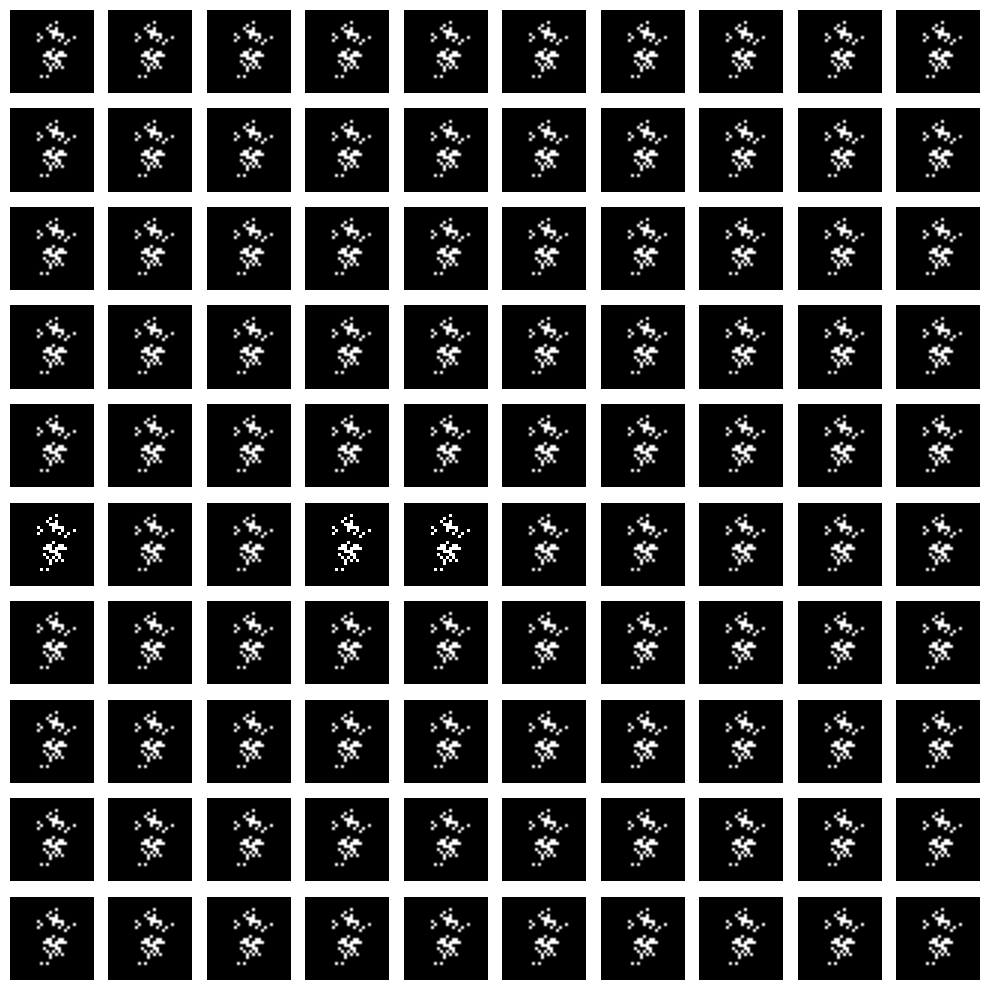

In [ ]:
import matplotlib.pyplot as plt
# Generate random noise as an input to initialize the generator
random_noise = np.random.normal(0,1, [100, 100])

# Generate the images from the noise
generated_images = generator.predict(random_noise)

# Visualize the generated images
plt.figure(figsize=(10,10))
for i in range(generated_images.shape[0]):
    plt.subplot(10, 10, i+1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

# __Conclusion__

In this demo, you have successfully implemented a GAN to generate images resembling handwritten digits, focusing on the MNIST dataset. The process involved constructing and training a generator and a discriminator. The results were promising, showcasing the GAN's ability to create images similar to the digit **8**, but also highlighted the need for further improvements in image quality.